In [154]:
# 정규분포를 따르는 데이터 생성
    # 한국인: 1000명, 육류소비량 53.9kg, 표준편차 5kg
    # 일본인: 1000명, 육류소비량 32.7lg, 표준편차 3kg

> >**02 데이터 변환**

In [203]:
# 기본 패키지
import pandas as pd
import numpy as np
# 데이터 전처리 및 분석
import scipy.stats as ss
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA


# 시각화
import matplotlib.pyplot as plt 

In [156]:
# 주어진 조건 맞춰서 생성
smaple_nb = 1000
ko_mu, ko_sigma = 53.9, 5
jp_mu, jp_sigma = 32.71, 3

In [157]:
# 방법1
# 표준편차 * 평균0,표준편차1인 값(표본개수만큼) + 평균
ko_meat_csmp = ko_sigma * np.random.randn(smaple_nb) + ko_mu
jp_meat_csmp = jp_sigma * np.random.randn(smaple_nb) + jp_mu

print(len(ko_meat_csmp), ko_meat_csmp[0], ko_meat_csmp.mean(), ko_meat_csmp.std())
print(len(jp_meat_csmp), jp_meat_csmp[0], jp_meat_csmp.mean(), jp_meat_csmp.std())

1000 50.59903251469303 53.77551612415222 4.852400900875581
1000 30.226648348612596 32.4743892478983 2.9966723219133904


In [158]:
# 방법2
# np.random.normal(mu, sigma, sample_nb) 사용
ko_meat_csmp = np.random.normal(ko_mu, ko_sigma, smaple_nb)
jp_meat_csmp = np.random.normal(jp_mu, jp_sigma, smaple_nb)
print(len(ko_meat_csmp), ko_meat_csmp[0], ko_meat_csmp.mean(), ko_meat_csmp.std())
print(len(jp_meat_csmp), jp_meat_csmp[0], jp_meat_csmp.mean(), jp_meat_csmp.std())

1000 50.61617575348779 53.956320401840145 5.039739019917674
1000 41.12663812324497 32.626192222043805 2.833900465352473


In [159]:
# df 생성
meat_csmp = pd.DataFrame({'Korean': ko_meat_csmp, 'Japanese': jp_meat_csmp})
meat_csmp.head()

,Korean,Japanese
0,50.616176,41.126638
1,43.897153,27.723604
2,58.662044,31.635964
3,55.620691,33.233428
4,62.328094,29.361362


In [160]:
# 정규화 진행:  Z-표준화
# 각 데이터 값에서 평균을 뺀 후, 표준편차로 나누어준 값
# 방법1 | numpy > z = (x - mean(x)) / std(x)
# 방법2 | scipy.stats > zscore()
# 방법3 | sklearn.preprocessing > StandardScaler().fit_trandsform()

In [161]:
# 방법1 | numpy > z = (x - mean(x) / std(x))
std1_meat_csmp = (meat_csmp - np.mean(meat_csmp)) / np.std(meat_csmp)
# 기존 df에 열추가해서 넣기
meat_csmp['Korean_Z_std_np'] = std1_meat_csmp['Korean']
meat_csmp['Japanese_Z_std_np'] = std1_meat_csmp['Japanese']

display(meat_csmp.head(3))
print('-'*50)
print(std1_meat_csmp.mean())
print('-'*50)
print(std1_meat_csmp.std())

c:\Users\Administrator\Anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,Korean,Japanese,Korean_Z_std_np,Japanese_Z_std_np
0,50.616176,41.126638,-0.662761,2.999557
1,43.897153,27.723604,-1.995970,-1.729979
2,58.662044,31.635964,0.933724,-0.349422


--------------------------------------------------
Korean      2.522427e-16
Japanese    7.851497e-16
dtype: float64
--------------------------------------------------
Korean      1.0005
Japanese    1.0005
dtype: float64


In [162]:
# 방법2 | scipy.stats > zscore()
# 기존 df에 열 추가해서 넣기
meat_csmp['Korean_Z_std_ss'] = ss.zscore(meat_csmp['Korean'])
meat_csmp['Japanese_Z_std_ss'] = ss.zscore(meat_csmp['Japanese'])

display(meat_csmp.head())
print('-'*50)
print(meat_csmp[['Korean_Z_std_ss', 'Japanese_Z_std_ss']].mean())
print('-'*50)
print(meat_csmp[['Korean_Z_std_ss', 'Japanese_Z_std_ss']].std())

,Korean,Japanese,Korean_Z_std_np,Japanese_Z_std_np,Korean_Z_std_ss,Japanese_Z_std_ss
0,50.616176,41.126638,-0.662761,2.999557,-0.662761,2.999557
1,43.897153,27.723604,-1.995970,-1.729979,-1.995970,-1.729979
2,58.662044,31.635964,0.933724,-0.349422,0.933724,-0.349422
3,55.620691,33.233428,0.330249,0.214276,0.330249,0.214276
4,62.328094,29.361362,1.661152,-1.152062,1.661152,-1.152062


--------------------------------------------------
Korean_Z_std_ss      2.522427e-16
Japanese_Z_std_ss    7.922552e-16
dtype: float64
--------------------------------------------------
Korean_Z_std_ss      1.0005
Japanese_Z_std_ss    1.0005
dtype: float64


In [163]:
# 방법3 | sklearn.preprocessing > StandardScaler().fit_trandsform()
# scaler 이름으로 호출
scaler = StandardScaler()

# dataframe 형태로 넣어야 해서 이중 리스트
meat_csmp['Korean_Z_std_sk'] = scaler.fit_transform(meat_csmp[['Korean']])
meat_csmp['Japanese_Z_std_sk'] = scaler.fit_transform(meat_csmp[['Japanese']])

display(meat_csmp.head())
print('-'*50)
print(meat_csmp[['Korean_Z_std_sk', 'Japanese_Z_std_sk']].mean())
print('-'*50)
print(meat_csmp[['Korean_Z_std_sk', 'Japanese_Z_std_sk']].std())

,Korean,Japanese,Korean_Z_std_np,Japanese_Z_std_np,Korean_Z_std_ss,Japanese_Z_std_ss,Korean_Z_std_sk,Japanese_Z_std_sk
0,50.616176,41.126638,-0.662761,2.999557,-0.662761,2.999557,-0.662761,2.999557
1,43.897153,27.723604,-1.995970,-1.729979,-1.995970,-1.729979,-1.995970,-1.729979
2,58.662044,31.635964,0.933724,-0.349422,0.933724,-0.349422,0.933724,-0.349422
3,55.620691,33.233428,0.330249,0.214276,0.330249,0.214276,0.330249,0.214276
4,62.328094,29.361362,1.661152,-1.152062,1.661152,-1.152062,1.661152,-1.152062


--------------------------------------------------
Korean_Z_std_sk      2.522427e-16
Japanese_Z_std_sk    7.922552e-16
dtype: float64
--------------------------------------------------
Korean_Z_std_sk      1.0005
Japanese_Z_std_sk    1.0005
dtype: float64


In [164]:
# 정규화 진행: Min-Max 정규화
# 최대값을 1 최소값을 0 으로 맞추는 방법
# 방법1 | np > (x-min(x)) / (max(x)-min(x))
# 방법2 | sklearn.preprocessing > MinMaxScaler.fit_transform()

In [165]:
# 방법1 | np > (x-min(x)) / (max(x)-min(x))
meat_csmp['Korean_MM_std_np'] = (meat_csmp['Korean'] - np.min(meat_csmp['Korean'])) / (np.max(meat_csmp['Korean']) - np.min(meat_csmp['Korean']))
meat_csmp['Japanese_MM_std_np'] = (meat_csmp['Japanese'] - np.min(meat_csmp['Japanese'])) / (np.max(meat_csmp['Japanese']) - np.min(meat_csmp['Japanese']))

display(meat_csmp.head(3))
print('-'*50)
print(meat_csmp[['Korean_MM_std_np', 'Japanese_MM_std_np']].min())
print('-'*50)
print(meat_csmp[['Korean_MM_std_np', 'Japanese_MM_std_np']].max())

,Korean,Japanese,Korean_Z_std_np,Japanese_Z_std_np,Korean_Z_std_ss,Japanese_Z_std_ss,Korean_Z_std_sk,Japanese_Z_std_sk,Korean_MM_std_np,Japanese_MM_std_np
0,50.616176,41.126638,-0.662761,2.999557,-0.662761,2.999557,-0.662761,2.999557,0.425803,0.954802
1,43.897153,27.723604,-1.995970,-1.729979,-1.995970,-1.729979,-1.995970,-1.729979,0.230787,0.259897
2,58.662044,31.635964,0.933724,-0.349422,0.933724,-0.349422,0.933724,-0.349422,0.659328,0.462741


--------------------------------------------------
Korean_MM_std_np      0.0
Japanese_MM_std_np    0.0
dtype: float64
--------------------------------------------------
Korean_MM_std_np      1.0
Japanese_MM_std_np    1.0
dtype: float64


In [166]:
# 방법2 | sklearn.preprocessing > MinMaxScaler.fit_transform()
scaler = MinMaxScaler()

# df 형태로 넣어야 해서 이중 리스트
meat_csmp['Korean_MM_std_sk'] = scaler.fit_transform(meat_csmp[['Korean']])
meat_csmp['Japanese_MM_std_sk'] = scaler.fit_transform(meat_csmp[['Japanese']])

display(meat_csmp.head(3))
print('-'*50)
print(meat_csmp[['Korean_MM_std_sk', 'Japanese_MM_std_sk']].min())
print('-'*50)
print(meat_csmp[['Korean_MM_std_sk', 'Japanese_MM_std_sk']].max())

,Korean,Japanese,Korean_Z_std_np,Japanese_Z_std_np,Korean_Z_std_ss,Japanese_Z_std_ss,Korean_Z_std_sk,Japanese_Z_std_sk,Korean_MM_std_np,Japanese_MM_std_np,Korean_MM_std_sk,Japanese_MM_std_sk
0,50.616176,41.126638,-0.662761,2.999557,-0.662761,2.999557,-0.662761,2.999557,0.425803,0.954802,0.425803,0.954802
1,43.897153,27.723604,-1.995970,-1.729979,-1.995970,-1.729979,-1.995970,-1.729979,0.230787,0.259897,0.230787,0.259897
2,58.662044,31.635964,0.933724,-0.349422,0.933724,-0.349422,0.933724,-0.349422,0.659328,0.462741,0.659328,0.462741


--------------------------------------------------
Korean_MM_std_sk      0.0
Japanese_MM_std_sk    0.0
dtype: float64
--------------------------------------------------
Korean_MM_std_sk      1.0
Japanese_MM_std_sk    1.0
dtype: float64


In [167]:
# 분포의 왜도 구하기
# 양수일 수록 왼쪽에, 음수일 수록 오른쪽으로 치우치는 모양
df = pd.read_csv('C:/Engineer_Big_Data_Analysis/DATAS/이기적데이터/USJudgeRatings.csv')
print(df.shape)
df.head()

(43, 13)


,Unnamed: 0,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN
0,"AARONSON,L.H.",5.7,7.9,7.7,7.3,7.1,7.4,7.1,7.1,7.1,7.0,8.3,7.8
1,"ALEXANDER,J.M.",6.8,8.9,8.8,8.5,7.8,8.1,8.0,8.0,7.8,7.9,8.5,8.7
2,"ARMENTANO,A.J.",7.2,8.1,7.8,7.8,7.5,7.6,7.5,7.5,7.3,7.4,7.9,7.8
3,"BERDON,R.I.",6.8,8.8,8.5,8.8,8.3,8.5,8.7,8.7,8.4,8.5,8.8,8.7
4,"BRACKEN,J.J.",7.3,6.4,4.3,6.5,6.0,6.2,5.7,5.7,5.1,5.3,5.5,4.8


In [168]:
# 두 개 열의 왜도를 확인
print(ss.skew(df['CONT'])) # 양수는 왼쪽으로 치우침
print(ss.skew(df['PHYS'])) # 음수는 오른쪽으로 치우침

1.0859724796276253
-1.5582154642293153


In [169]:
# 로그를 취해서 왜도를 조정해주자
# log 변환
# 양수일 경우
print(ss.skew(np.log(df['CONT'])))
# 음수일 경우
print(ss.skew(np.log((np.max(df['PHYS']) + 1) - df['PHYS'])))

# log10 변환
print(ss.skew(np.log10(df['CONT'])))
print(ss.skew(np.log10((np.max(df['PHYS']) + 1) - df['PHYS'])))

0.6555571886692603
0.5824357748750443
0.6555571886692441
0.582435774875044


In [170]:
# 범주화, 이산형화 진행
# 데이터 먼저 만들기
data = [["철수",52], ["영희",92], ["미영",84], ["시완",71], ["미경",65], ["영환",81], ["숙경",66], ["부영",77], ["민섭",73], ["보연",74]]
df = pd.DataFrame(data,columns=['이름','수학점수'])
df

,이름,수학점수
0,철수,52
1,영희,92
2,미영,84
3,시완,71
4,미경,65
5,영환,81
6,숙경,66
7,부영,77
8,민섭,73
9,보연,74


In [171]:
# 조건을 사용해서 구간을 직접 지정하기
# 등급 컬럼을 만들고 0으로 초기화
df['등급'] = 0 
# 직접 지정
df.loc[df['수학점수'] < 60, '등급'] = 'F'
df.loc[(df['수학점수']>=60) & (df['수학점수']<70), '등급'] = 'D'
df.loc[(df["수학점수"]>=70) & (df["수학점수"]<80), "등급"] = "C"
df.loc[(df["수학점수"]>=80) & (df["수학점수"]<90), "등급"] = "B"
df.loc[(df["수학점수"]>=90) & (df["수학점수"]<=100), "등급"] = "A"
df

,이름,수학점수,등급
0,철수,52,F
1,영희,92,A
2,미영,84,B
3,시완,71,C
4,미경,65,D
5,영환,81,B
6,숙경,66,D
7,부영,77,C
8,민섭,73,C
9,보연,74,C


In [172]:
# cut() 함수 활용
# bins로 직접 수치를 지정
# pd.cut(x=데이터, bins=[경계값리스트], labels=[bin이름], include_lowest=True)
# include_lowest: 낮음 경겟값 포함 여부(60 <= x < 70 에서 60)
df['등급'] = pd.cut(df['수학점수'], bins=[0, 60, 70, 80, 90, 100], labels=['F', 'D', 'C', 'B', 'A'], include_lowest=True)
df

,이름,수학점수,등급
0,철수,52,F
1,영희,92,A
2,미영,84,B
3,시완,71,C
4,미경,65,D
5,영환,81,B
6,숙경,66,D
7,부영,77,C
8,민섭,73,C
9,보연,74,C


In [173]:
# qcut() 함수 사용
# 나누고자 하는 개수를 q로 지정하면 알아서 균등하게 채워짐
df['등급'] = pd.qcut(df['수학점수'], q=5, labels=['F', 'D', 'C', 'B', 'A'])
df

,이름,수학점수,등급
0,철수,52,F
1,영희,92,A
2,미영,84,A
3,시완,71,D
4,미경,65,F
5,영환,81,B
6,숙경,66,D
7,부영,77,B
8,민섭,73,C
9,보연,74,C


>>**03 차원축소 : PCA(Principal Component Analysis, 주성분 분석)**

In [174]:
# 차원축소 PCA 하기
# 아이리스 데이터 사용
iris = pd.read_csv('C:/Engineer_Big_Data_Analysis/DATAS/이기적데이터/iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [175]:
# PCA는 연속형 데이터만 사용 가능하니 범주형 데이터인 species와 분리
df_species = iris['species']
df = iris.drop(['species'], axis=1)

df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [176]:
# 변수간의 스케일 차이가 많이나면 PCA에 영향을 주므로
# 변수 정규화 적용
scalser = StandardScaler()
df['sepal_length'] = scaler.fit_transform(df[['sepal_length']])
df['sepal_width'] = scaler.fit_transform(df[['sepal_width']])
df['petal_length'] = scaler.fit_transform(df[['petal_length']])
df['petal_width'] = scaler.fit_transform(df[['petal_width']])

df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [177]:
# PCA 진행하기
# n_components = pca 적용할 특성 수
pca = PCA(n_components=4)
# fit_transfrom으로 df에 함수 적용
p_score = pca.fit_transform(df)
# 결과 확인
print(p_score.shape)
print(p_score[0])
print('-'*50)
# 차원의 기여도 확인
print(pca.explained_variance_ratio_)
# [0.84136038 0.11751808 0.03473561 0.00638592]
# 1,2번째 변수만으로 데이터를 설명할 수 있으니 실제 상황에서는 앞의 2개만 사용을 권장

(150, 4)
[-0.63070293  0.10757791 -0.0187191  -0.00730695]
--------------------------------------------------
[0.84136038 0.11751808 0.03473561 0.00638592]


>>**04 결측치 처리**

In [178]:
# 여러 결측치 처리 방법 진행
df = pd.read_csv('C:/Engineer_Big_Data_Analysis/DATAS/이기적데이터/df_sample.csv')
df

,학번,중간,기말,리포트,퀴즈
0,S01,90,95,20,20
1,S02,82,83,18,18
2,S03,80,78,18,18
3,S04,78,75,10,10
4,S05,93,91,12,12
5,S06,71,75,16,16
6,S07,60,80,18,18
7,S08,72,65,14,14
8,S09,65,65,14,14
9,S10,85,78,10,10


In [179]:
# 결측치 있는 값을 임의로 추가하기
df['토론'] = [14,15,13,14,None,None,19,11,12,18]
df.info()
# 토론의 Non-Null Count 개수만 다름

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학번      10 non-null     object 
 1   중간      10 non-null     int64  
 2   기말      10 non-null     int64  
 3   리포트     10 non-null     int64  
 4   퀴즈      10 non-null     int64  
 5   토론      8 non-null      float64
dtypes: float64(1), int64(4), object(1)
memory usage: 612.0+ bytes


In [180]:
# 그럼 타이타닉 데이터로 더 상세하게 처리해보자
# 방법1 | 완전 분석법(결측치가 있는 행 제거)
# 방법2 | 평균대치법(평균값으로 대치)
# 방법3 | 단순확률 대치법(확률 분포를 이용한 추정값 혹은 주변값으로 대치)

df = pd.read_csv('C:/Engineer_Big_Data_Analysis/DATAS/이기적데이터/titanic.csv')
print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [181]:
# None값 있는지 확인
print(df.isna().sum())
print('-'*50)
# or
df.info()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64

In [182]:
# 방법1 | 완전 분석법(결측치가 있는 행 제거)
# dropna() 이용하기
df_1 = df.dropna()
print(df_1.shape)
print(df_1.isna().sum())

(183, 12)
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [183]:
# 방법2 | 평균대치법(평균값으로 대치)
df_1 = df.copy()

# Age영을 평균값으로 대치해보기
print(df_1.Age.isna().sum())

# Age의 평균값 확인
print(df_1.Age.mean())
# fillna로 Age의 결측값에 평균값 대치
df_1.Age.fillna(df_1.Age.mean(), inplace=True)
print(df_1.Age.isna().sum())
df_1.head()

177
29.69911764705882
0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [184]:
# Embarked 컬럼의 결측치를 최빈값으로 대체
print(df_1.Embarked.isna().sum())
print('-'*50)

# 최빈값 확인
print(df_1.Embarked.mode()[0])
# 대체
df_1.Embarked.fillna(df_1.Embarked.mode()[0], inplace=True)
print(df_1.Embarked.isna().sum())
df_1.head()

2
--------------------------------------------------
S
0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [188]:
# 방법3 | 단순확률 대치법(확률 분포를 이용한 추정값 혹은 주변값으로 대치)
df_3 = df.copy()

# 주변값으로 대치
df_3.Age.fillna(method='ffill') # 결측값의 앞 행의 값으로 대체
df_3.Age.fillna(method='bfill') # 결측값의 다음 행 값으로 대체

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    26.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [192]:
# 그룹을 나눠서 대체하기
# Sex와 Pclass 기준으로 Age 평균보기
print(df_3.groupby('Sex').Age.mean())
print(df_3.groupby('Pclass').Age.mean())
# 이 중에서 Pclass별 차이가 더 크므로 Plass에 따른 평균값으로 대치하기

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64
Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


In [198]:
# Age의 결측 부분에 Pclass 그룹별 Age의 평균값을 대치하기
df_3.Age.fillna(df_3.groupby('Pclass').Age.transform('mean'))

0      22.00000
1      38.00000
2      26.00000
3      35.00000
4      35.00000
         ...   
886    27.00000
887    19.00000
888    25.14062
889    26.00000
890    32.00000
Name: Age, Length: 891, dtype: float64

>>**05 이상치(Outlier) 처리**

In [200]:
# 이상치 처리 연습용 df 만들기
# np.random.normal(mu, sigma, sample_nb) 사용
df_mu, df_sigma, sample_nb = 50, 10, 200
df_data = np.random.normal(df_mu, df_sigma, sample_nb)
df = pd.DataFrame({'값': df_data})
df

,값
0,70.989513
1,48.176443
2,53.675613
3,20.614838
4,57.153265
...,...
195,49.873563
196,61.843240
197,59.049426
198,41.493076


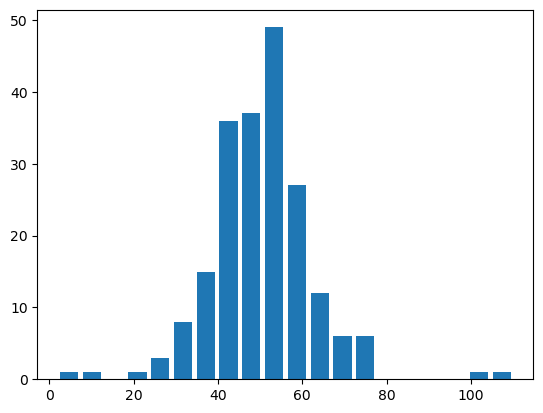

In [204]:
# 임의의 이상치 삽입
# 데이터는 200까지 있음, 그 뒤에 이어서 붙이기
df.loc[201] = 2
df.loc[202] = 100
df.loc[203] = 10
df.loc[204] = 110

# 시각화
plt.hist(df["값"], bins=20, rwidth=0.8)
plt.show()

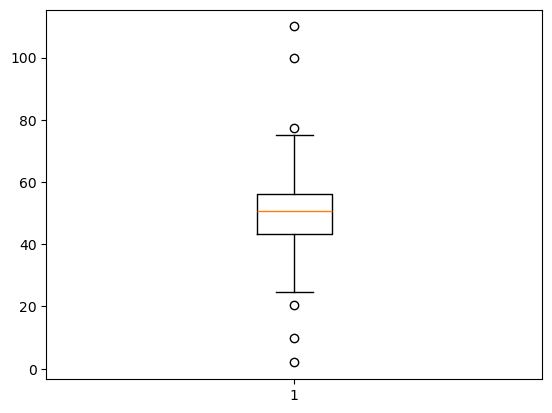

In [205]:
plt.boxplot(df["값"])
plt.show()

In [206]:
# IQR을 사용한 이상치 찾기
# 박스 플롯에서 박스 자체는 Q1 ~ Q3이고
# 가장 아래는 Minimum으로 Q1-(IQR*1.5)
# 가장 위는 Maximum으로 Q3+(IQR*1.5)이니
# 그 값 사이에 위치하지 않는 데이터를 찾으면 됨

In [214]:
Q1 = df.값.quantile(.25)
Q2 = df.값.quantile(.5)
Q3 = df.값.quantile(.75)
IQR = Q3 - Q1

print("Q1 =",Q1)
print("Q2 =",Q2)
print("Q3 =",Q3)
print("IQR =",IQR)

Q1 = 43.26312011300256
Q2 = 50.62570855964034
Q3 = 56.1077662431115
IQR = 12.844646130108941


In [218]:
# 작은 이상치
display(df[df.값 < Q1 - (IQR*1.5)])
# 큰 이상치
display(df[df.값 > Q3 + (IQR*1.5)])

,값
3,20.614838
201,2.000000
203,10.000000


,값
184,77.328918
202,100.000000
204,110.000000


>>**06 평활화(Smoothing)**

In [219]:
# 단순 이동 평균(SMA)
    # 단순 이동 평균은 일정한 기간 동안의 데이터 포인트들의 산술 평균을 계산
    # 예를 들어, 5일 단순 이동 평균은 최근 5일 간의 데이터 포인트들의 평균을 계산

# 지수 이동 평균(EMA)
    # 지수 이동 평균은 최근 데이터 포인트에 더 큰 가중치를 부여하여 계산
    # 과거 데이터보다 최근 데이터가 더 중요한 경우에 유용

In [223]:
# 데이터 불러오기
df = pd.read_csv('C:/Engineer_Big_Data_Analysis/DATAS/이기적데이터/lynx.csv')
print(df.shape)
df.head(3)

(114, 3)


,Unnamed: 0,time,value
0,1,1821,269
1,2,1822,321
2,3,1823,585


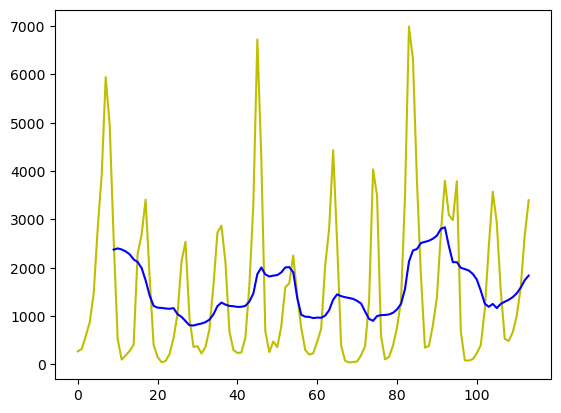

In [233]:
# 이동평균 SMA 이용하기
# rolling(데이터 개수).mean()
df['sma'] = df.value.rolling(10).mean()

plt.plot(df["value"], color='y')
plt.plot(df["sma"], color='b')
plt.show()

# sma가 훨씬 평활화됨

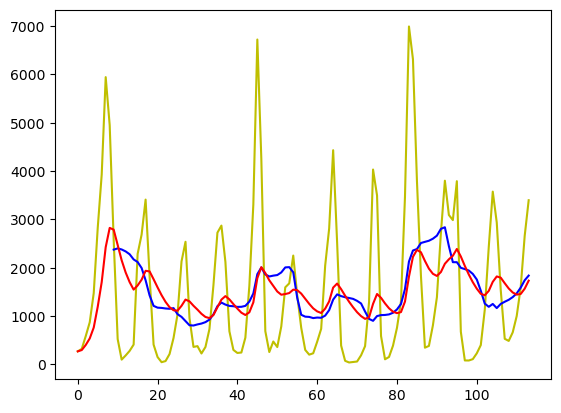

In [239]:
# 지수 이동 평균(EMA) 이용하기
df['ewm'] = df.value.ewm(10).mean()

plt.plot(df["value"], color='y')
plt.plot(df["sma"], color='b')
plt.plot(df["ewm"], color='red')
plt.show()